# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset

In [2]:
df_places = pd.read_csv('./places_ile-de-france.csv')
df_places.head()

,id,nom,nbAvis,latitude,longitude,shape_gid,gtrip
0,781971,Amici - FERMÉ,4,48.857704,2.358520,83325,190428
1,1853199,How to become Parisian in one hour?,2223,48.871410,2.344867,83329,187147
2,232159,Musée Nissim de Camondo,1445,48.878780,2.312930,76102,187147
3,188757,Musée du Louvre,65846,48.861046,2.335324,82481,187147
4,190202,Sainte-Chapelle,15958,48.855370,2.345135,82481,187147


C:\Users\yh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


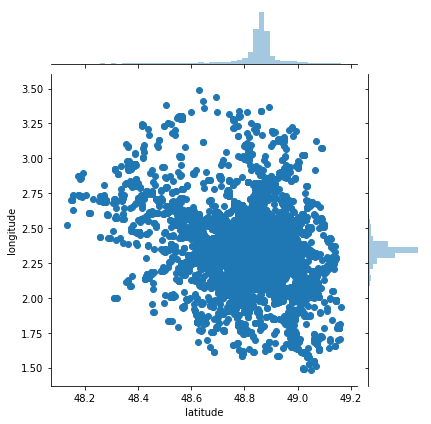

In [19]:
sns.jointplot(x=df_places['latitude'], y=df_places['longitude'], kind='scatter')

# Data selection

In [4]:
dfs = df
#dfs = dfs[(dfs['latitude'] > 40) & (dfs['longitude'] > -20)]
df.count() - dfs.count()

id           0
nom          0
nbAvis       0
latitude     0
longitude    0
shape_gid    0
gtrip        0
dtype: int64

# Analysis 

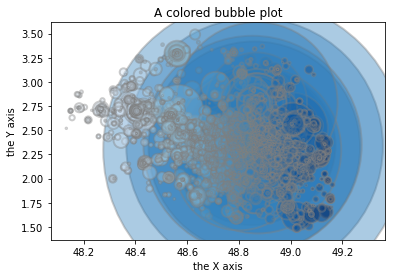

In [20]:
# create data
x = df_places['latitude']
y = df_places['longitude']
z = df_places['nbAvis']

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()

In [3]:
import folium

print(folium.__version__)

0.7.0


In [8]:
from folium.plugins import HeatMap

#m = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)
m = folium.Map([48.864716, 2.349014], tiles='stamentoner', zoom_start=9)

HeatMap(df_places[['latitude', 'longitude', 'nbAvis']].values.tolist()).add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [9]:
df_reviews = pd.read_csv('./reviews_ile-de-france.csv')
df_reviews.head()

,id,idplace,idauteur,note,date_review,date_visit,langue
0,359749957,1853199,631FC6F4F295BAB874F6D18C082B3B8F,5,2016-03-29,2016-02-01,fra
1,343014576,1853199,79769911D39C1CC574C176A2F998D7D6,5,2016-01-27,2016-01-01,fra
2,341141381,1853199,4F35E27CE081C644A6613EFCC222FDB3,4,2016-01-19,2016-01-01,fra
3,321598200,1853199,4A7445267FA2DB863C442742C596D02E,5,2015-10-25,2015-10-01,fra
4,315686315,1853199,999394B760E7009BEB828C91AB65DBAD,5,2015-10-02,2015-10-01,fra


# Cleaning empty date_visit 

In [4]:
len(df_reviews[df_reviews["date_visit"] == "0000-00-00"])

245808

In [ ]:
for i in range(len(df_reviews)):
    if df_reviews["date_visit"][i] == "0000-00-00" :
        tmp_var = str(df_reviews["date_review"][i])
        df_reviews["date_visit"][i] = tmp_var

C:\Users\yh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
len(df_reviews[df_reviews["date_visit"] == "0000-00-00"])

245744

# Volume per place using reviews

In [53]:
nb_places = len(df_places)
nb_places

37304

In [52]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.head()

,id,latitude,longitude
0,781971,48.857704,2.358520
1,1853199,48.871410,2.344867
2,232159,48.878780,2.312930
3,188757,48.861046,2.335324
4,190202,48.855370,2.345135


In [57]:
tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])

for i in range(nb_places):
    tmp_volume["volume"][i] = len(df_reviews[df_reviews["idplace"] == df_tmp_places["id"][i] ])

In [58]:
tmp_volume

,volume
0,0
1,2227
2,1453
3,66186
4,16132
5,5324
6,11935
7,2190
8,3845
9,4730


# Using reviews in time

In [5]:
from datetime import datetime

In [6]:
def add_one_month(date):
    if date.month < 12 : 
        return date.replace(month=date.month+1)
    else :
        return date.replace(month=1, year=date.year+1)

In [79]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places = df_tmp_places.iloc[1:11]
df_tmp_places.reset_index(inplace=True,drop=True)
nb_places = len(df_tmp_places)
df_tmp_places.head()

,id,latitude,longitude
0,1853199,48.871410,2.344867
1,232159,48.878780,2.312930
2,188757,48.861046,2.335324
3,190202,48.855370,2.345135
4,191240,48.853703,2.334116


In [78]:
# BEGINNING DATE : 2002-02-21  - ENDING DATE : 2016-12-09
year = 2002
month = 2
day = 1
#date_from = datetime.strptime(str(year)+'-'+str(month)+'-'+str(day), '%Y-%m-%d')
#date_to = add_one_month(date_from)
date_from = datetime.strptime('2014-01-01', '%Y-%m-%d')
date_to = add_one_month(date_from) #datetime.strptime('2013-12-31', '%Y-%m-%d') 

# periodic_volumes is an array containing all volumes for each place, each month
# periodic_volumes is an array of arrays : [ [[latitude, longitude, volume],... ], ... ]
periodic_volumes =[] 

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 3 #178 #https://www.calendrier-365.fr/calculez/21-02-2002_09-12-2016.html
for j in range(number_of_month) :
    
    # creating df volume
    tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])
    for i in range(nb_places):
        
        tmp_selected_reviews = df_reviews[(df_reviews["idplace"] == df_tmp_places["id"][i]) 
                                         & (df_reviews["date_review"] != "0000-00-00")]
        
        # Reinitializing index of dataframe :
        tmp_selected_reviews.reset_index(inplace=True,drop=True)
        
        bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])
        print("j : "+str(j)+" ; i : " + str(i))
        for k in range(len(tmp_selected_reviews)): 
            bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
            bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

        tmp_volume["volume"][i] = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
        

    
    # fusion avec df places
    df_result = pd.concat([df_tmp_places[["latitude","longitude"]], tmp_volume],axis=1) 
    
    # conversion en array
    tmp_array = df_result.values.tolist()
    
    # ajout à l'array globale
    periodic_volumes.append(tmp_array)
    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)

    
# calculer les volume sur un mois, ranger ca dans une array, faire pareil pour les mois suivants


j : 0 ; i : 0
j : 0 ; i : 1
j : 0 ; i : 2
j : 0 ; i : 3
j : 0 ; i : 4
j : 0 ; i : 5
j : 0 ; i : 6
j : 0 ; i : 7
j : 0 ; i : 8
j : 0 ; i : 9
j : 1 ; i : 0
j : 1 ; i : 1
j : 1 ; i : 2
j : 1 ; i : 3
j : 1 ; i : 4
j : 1 ; i : 5
j : 1 ; i : 6
j : 1 ; i : 7
j : 1 ; i : 8
j : 1 ; i : 9
j : 2 ; i : 0
j : 2 ; i : 1
j : 2 ; i : 2
j : 2 ; i : 3
j : 2 ; i : 4
j : 2 ; i : 5
j : 2 ; i : 6
j : 2 ; i : 7
j : 2 ; i : 8
j : 2 ; i : 9


In [62]:
tmp1 = pd.DataFrame(index=range(10), columns=["col1", "col3", "col4"])
tmp2 = pd.DataFrame(index=range(10), columns=["col2"])
tmp3 = tmp1[["col4", "col3"]] + tmp2

In [52]:

date_from = datetime.strptime('2014-01-01', '%Y-%m-%d')
date_to = datetime.strptime('2014-01-31', '%Y-%m-%d') 

tmp_selected_reviews = df_reviews[df_reviews["idplace"] == df_tmp_places["id"][1] ]

bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])

for k in range(len(tmp_selected_reviews)): 
    bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
    bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])

36

In [80]:
#import folium
import folium.plugins as plugins

m = folium.Map([48.864716, 2.349014], tiles='stamentoner', zoom_start=11)

hm = plugins.HeatMapWithTime(periodic_volumes)

hm.add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [81]:
periodic_volumes

[[[48.87141, 2.344867, 37],
  [48.87878, 2.3129299999999997, 21],
  [48.861046, 2.335324, 814],
  [48.85537, 2.345135, 154],
  [48.853703, 2.334116, 9],
  [48.863846, 2.322273, 115],
  [48.850273, 2.3441330000000002, 17],
  [48.855540000000005, 2.347689, 75],
  [48.86158, 2.314682, 38],
  [48.863132, 2.313507, 164]],
 [[48.87141, 2.344867, 56],
  [48.87878, 2.3129299999999997, 16],
  [48.861046, 2.335324, 644],
  [48.85537, 2.345135, 125],
  [48.853703, 2.334116, 23],
  [48.863846, 2.322273, 76],
  [48.850273, 2.3441330000000002, 24],
  [48.855540000000005, 2.347689, 33],
  [48.86158, 2.314682, 26],
  [48.863132, 2.313507, 140]],
 [[48.87141, 2.344867, 37],
  [48.87878, 2.3129299999999997, 15],
  [48.861046, 2.335324, 747],
  [48.85537, 2.345135, 150],
  [48.853703, 2.334116, 35],
  [48.863846, 2.322273, 106],
  [48.850273, 2.3441330000000002, 17],
  [48.855540000000005, 2.347689, 57],
  [48.86158, 2.314682, 38],
  [48.863132, 2.313507, 142]]]